In [1]:
#Importing the required libraries
##########################################################################################

import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

%matplotlib inline

In [2]:
# Initiating H2O
h2o.init()
h2o.connect()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)56-b12)
  Starting server from C:\Users\vip\Anaconda3\h2o_jar\h2o.jar
  Ice root: C:\Users\vip\AppData\Local\Temp\tmpmlun4boe
  JVM stdout: C:\Users\vip\AppData\Local\Temp\tmpmlun4boe\h2o_vip_started_from_python.out
  JVM stderr: C:\Users\vip\AppData\Local\Temp\tmpmlun4boe\h2o_vip_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,05 secs
H2O cluster timezone:,Europe/Berlin
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,"1 year, 3 months and 2 days !!!"
H2O cluster name:,H2O_from_python_vip_6i4pkw
H2O cluster total nodes:,1
H2O cluster free memory:,1.768 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


Connecting to H2O server at http://localhost:54321... successful.


H2O cluster uptime:,06 secs
H2O cluster timezone:,Europe/Berlin
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,"1 year, 3 months and 2 days !!!"
H2O cluster name:,H2O_from_python_vip_6i4pkw
H2O cluster total nodes:,1
H2O cluster free memory:,1.768 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"locked, healthy"


<H2OConnection to http://localhost:54321, no session>

In [3]:
#Read the data from CSV file downloaded from (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) into a Pandas DataFrame
##########################################################################################
dfh = h2o.import_file('Bank_data.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
dfh.types

{'id': 'int',
 'age': 'int',
 'job': 'enum',
 'marital': 'enum',
 'education': 'enum',
 'default': 'enum',
 'housing': 'enum',
 'loan': 'enum',
 'contact': 'enum',
 'month': 'enum',
 'day_of_week': 'enum',
 'pdays': 'int',
 'previous': 'int',
 'poutcome': 'enum',
 'emp.var.rate': 'real',
 'cons.price.idx': 'real',
 'cons.conf.idx': 'real',
 'euribor3m': 'real',
 'nr.employed': 'real',
 'y': 'enum'}

In [5]:
## Dropping unnecessary columns
dfh = dfh.drop("id")

In [6]:
dfh.describe()

Rows:40000
Cols:19




,age,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
type,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,int,enum,real,real,real,real,real,enum
mins,17.0,,,,,,,,,,0.0,0.0,,-3.4,92.201,-50.8,0.634,4963.6,
mean,40.0225,,,,,,,,,,962.508475,0.173,,0.08033750000000027,93.57512877500001,-40.499225,3.619882650000001,5166.972602500001,
maxs,98.0,,,,,,,,,,999.0,7.0,,1.4,94.767,-26.9,5.045,5228.1,
sigma,10.411570667776033,,,,,,,,,,186.82785671407652,0.49358595064817923,,1.5715827636186779,0.5791939265756477,4.63133114018834,1.7349589918054438,72.27262842838572,
zeros,0,,,,,,,,,,14,34525,,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
#Removing all the unknowns that are not significant in number (<10% data loss)
##########################################################################################

dfh = dfh[dfh["job"] != 'unknown']
dfh = dfh[dfh["marital"] != 'unknown']
dfh = dfh[dfh["education"] != 'unknown']
dfh = dfh[dfh["housing"] != 'unknown']
dfh = dfh[dfh["loan"] != 'unknown']
dfh.describe()

Rows:37144
Cols:19




,age,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
type,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,int,enum,real,real,real,real,real,enum
mins,17.0,,,,,,,,,,0.0,0.0,,-3.4,92.201,-50.8,0.634,4963.6,
mean,39.860031229808314,,,,,,,,,,963.5234492784838,0.17033706655179848,,0.08142095627826834,93.56989715701054,-40.53771268576352,3.6219613665733355,5167.366619104028,
maxs,98.0,,,,,,,,,,999.0,7.0,,1.4,94.767,-26.9,5.045,5228.1,
sigma,10.278486769285147,,,,,,,,,,184.3145703699238,0.4870582986496236,,1.5665231543609073,0.5767247717283043,4.625811773397154,1.7307398404823333,71.79199435647212,
zeros,0,,,,,,,,,,14,32101,,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
#Scaling the numeric data
# Appropriate methods of scaling was used for different variables based on their histograms
##################################################################################################

dfh["age"] = dfh["age"].scale(center = True, scale = True)
dfh["pdays"] = dfh["pdays"].scale(center = True, scale = True)
dfh["previous"] = dfh["previous"].scale(center = True, scale = True)
dfh["emp.var.rate"] = dfh["emp.var.rate"].scale(center = True, scale = True)
dfh["cons.price.idx"] = dfh["cons.price.idx"].scale(center = True, scale = True)
dfh["cons.conf.idx"] = dfh["cons.conf.idx"].scale(center = True, scale = True)
dfh["euribor3m"] = dfh["euribor3m"].scale(center = True, scale = True)
dfh["nr.employed"] = dfh["nr.employed"].scale(center = True, scale = True)

dfh.describe()

Rows:37144
Cols:19




,age,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
type,real,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum,real,real,real,real,real,enum
mins,-2.224065832153442,,,,,,,,,,-5.227603261883576,-0.34972623816093584,,-2.2223871677776637,-2.373570937326479,-2.2184835477427876,-1.7264069946761218,-2.838291663723063,
mean,-6.886586928538554e-17,,,,,,,,,,-3.9177027860130446e-16,-1.7139949688807069e-16,,-9.794256965032611e-17,1.9490571360414896e-14,1.6895093264681254e-15,2.9382770895097834e-16,-7.737463002375763e-15,
maxs,5.656471626147283,,,,,,,,,,0.1924782758645392,14.022269926174225,,0.8417233030045258,2.0756917366355268,2.9481771749108834,0.8222140613750957,0.8459631389317551,
sigma,1.0,,,,,,,,,,1.0,0.9999999999999998,,1.0000000000000002,0.9999999999999984,0.999999999999999,1.0000000000000002,1.0000000000000036,
zeros,0,,,,,,,,,,0,0,,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.5702670181394998,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.1924782758645392,-0.34972623816093584,nonexistent,0.6502163985806391,0.7353643605744942,0.8944835822242776,0.7135899946016593,0.3291924274818682,no
1,1.6675576040444469,services,married,high.school,unknown,no,no,telephone,may,mon,0.1924782758645392,-0.34972623816093584,nonexistent,0.6502163985806391,0.7353643605744942,0.8944835822242776,0.7135899946016593,0.3291924274818682,no
2,-0.2782541140544976,services,married,high.school,no,yes,no,telephone,may,mon,0.1924782758645392,-0.34972623816093584,nonexistent,0.6502163985806391,0.7353643605744942,0.8944835822242776,0.7135899946016593,0.3291924274818682,no


In [9]:
# Splitting our data into test and training set
##################################################################################################
train, valid = dfh.split_frame(ratios = [.8])
X = dfh.col_names[:-1] 
y = dfh.col_names[-1]

In [10]:
# Defining our models
##################################################################################################

rf = H2ORandomForestEstimator(seed=1, nfolds=5, model_id="rf",
    ntrees=200,
    max_depth=30,
    stopping_rounds=2,
    stopping_tolerance=0.01,
    score_each_iteration=True)

In [11]:
# Fitting our models
##################################################################################################

rf.train(x=X, y=y, training_frame=train, validation_frame = valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [12]:
# AUC of RF model
rf.auc()

0.7525684582660773

Metrics AUC and Recall will describe results better than conventional metric like Accuracy for the problem at hand

In [13]:
# Summary of Random forest model
rf.accuracy

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.08602550082977464
RMSE: 0.2933010413035976
LogLoss: 0.5466783996964268
Mean Per-Class Error: 0.2888370260127938
AUC: 0.7525684582660773
Gini: 0.5051369165321546
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28112784562688886: 


,no,yes,Error,Rate
no,24043.0,2325.0,0.0882,(2325.0/26368.0)
yes,1689.0,1565.0,0.5191,(1689.0/3254.0)
Total,25732.0,3890.0,0.1355,(4014.0/29622.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2811278,0.4381299,184.0
max f2,0.1428079,0.4967068,259.0
max f0point5,0.4724562,0.4610603,114.0
max accuracy,0.6145808,0.8964283,72.0
max precision,0.9663927,0.6772152,3.0
max recall,0.0,1.0,399.0
max specificity,1.0,0.9980658,0.0
max absolute_mcc,0.3333469,0.3651636,162.0
max min_per_class_accuracy,0.0714185,0.6954518,310.0
max mean_per_class_accuracy,0.1873866,0.7111630,232.0


Gains/Lift Table: Avg response rate: 10.98 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0107687,0.875,5.9073289,5.9073289,0.6489028,0.6489028,0.0636140,0.0636140,490.7328911,490.7328911
,2,0.0201870,0.7777778,5.5143457,5.7239806,0.6057348,0.6287625,0.0519361,0.1155501,451.4345729,472.3980570
,3,0.0300105,0.6819712,4.7551267,5.4068417,0.5223368,0.5939258,0.0467117,0.1622618,375.5126654,440.6841662
,4,0.0406103,0.625,4.7257359,5.2290634,0.5191083,0.5743973,0.0500922,0.2123540,372.5735890,422.9063430
,5,0.0500287,0.5701519,4.2418044,5.0432029,0.4659498,0.5539811,0.0399508,0.2523049,324.1804407,404.3202926
,6,0.1000236,0.3584672,3.1472149,4.0955288,0.3457124,0.4498819,0.1573448,0.4096497,214.7214855,309.5528834
,7,0.1500186,0.2484586,2.0100376,3.4005215,0.2207968,0.3735374,0.1004917,0.5101414,101.0037612,240.0521521
,8,0.2000135,0.1747048,1.2847029,2.8716562,0.1411209,0.3154430,0.0642286,0.5743700,28.4702939,187.1656151
,9,0.3006448,0.1000000,0.8611893,2.1987164,0.0945991,0.2415226,0.0866626,0.6610326,-13.8810706,119.8716369
,10,0.3999932,0.0499012,0.6464985,1.8131836,0.0710160,0.1991729,0.0642286,0.7252612,-35.3501511,81.3183647




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.0863755849428209
RMSE: 0.2938972353439564
LogLoss: 0.3222258742744698
Mean Per-Class Error: 0.28123710539264346
AUC: 0.7672727743583988
Gini: 0.5345455487167976
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25874535036293467: 


,no,yes,Error,Rate
no,6067.0,583.0,0.0877,(583.0/6650.0)
yes,437.0,434.0,0.5017,(437.0/871.0)
Total,6504.0,1017.0,0.1356,(1020.0/7521.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2587454,0.4597458,185.0
max f2,0.1808976,0.5106864,226.0
max f0point5,0.3762304,0.4770515,136.0
max accuracy,0.6906232,0.8909719,47.0
max precision,1.0,1.0,0.0
max recall,0.0000178,1.0,399.0
max specificity,1.0,1.0,0.0
max absolute_mcc,0.3210748,0.3866622,158.0
max min_per_class_accuracy,0.0789020,0.6945865,299.0
max mean_per_class_accuracy,0.1808976,0.7187629,226.0


Gains/Lift Table: Avg response rate: 11.58 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101050,0.8227445,6.2489425,6.2489425,0.7236842,0.7236842,0.0631458,0.0631458,524.8942534,524.8942534
,2,0.0202101,0.7380952,4.7719198,5.5104311,0.5526316,0.6381579,0.0482204,0.1113662,377.1919753,451.0431144
,3,0.0300492,0.6440335,4.2007633,5.0816019,0.4864865,0.5884956,0.0413318,0.1526980,320.0763335,408.1601861
,4,0.0401542,0.5873016,4.7719198,5.0036686,0.5526316,0.5794702,0.0482204,0.2009185,377.1919753,400.3668616
,5,0.0502593,0.5396825,3.5221312,4.7057934,0.4078947,0.5449735,0.0355913,0.2365098,252.2131247,370.5793377
,6,0.1001197,0.3408257,3.6611986,4.1855769,0.424,0.4847278,0.1825488,0.4190586,266.1198622,318.5576866
,7,0.1501130,0.2340136,2.1127953,3.4952616,0.2446809,0.4047830,0.1056257,0.5246843,111.2795271,249.5261649
,8,0.2001064,0.1615011,1.1941886,2.9203756,0.1382979,0.3382060,0.0597015,0.5843858,19.4188631,192.0375633
,9,0.3000931,0.0978664,0.7578505,2.1998533,0.0877660,0.2547630,0.0757750,0.6601607,-24.2149522,119.9853295
,10,0.4000798,0.0652536,0.7234027,1.8308633,0.0837766,0.2120306,0.0723307,0.7324914,-27.6597271,83.0863323




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.08175307604153385
RMSE: 0.2859249482670826
LogLoss: 0.31535529079774266
Mean Per-Class Error: 0.27686465078858247
AUC: 0.7697939446831867
Gini: 0.5395878893663735
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24316206853181713: 


,no,yes,Error,Rate
no,23956.0,2413.0,0.0915,(2413.0/26369.0)
yes,1568.0,1686.0,0.4819,(1568.0/3254.0)
Total,25524.0,4099.0,0.1344,(3981.0/29623.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2431621,0.4585883,203.0
max f2,0.1523458,0.5134430,250.0
max f0point5,0.4374543,0.4719281,127.0
max accuracy,0.6193187,0.8993350,75.0
max precision,0.9583333,0.8780488,3.0
max recall,0.0000842,1.0,399.0
max specificity,1.0,0.9998862,0.0
max absolute_mcc,0.2431621,0.3863546,203.0
max min_per_class_accuracy,0.0816234,0.7043639,302.0
max mean_per_class_accuracy,0.1523458,0.7231353,250.0


Gains/Lift Table: Avg response rate: 10.98 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0106674,0.8333333,6.7124386,6.7124386,0.7373418,0.7373418,0.0716042,0.0716042,571.2438634,571.2438634
,2,0.0200520,0.7395833,5.5669281,6.1763243,0.6115108,0.6784512,0.0522434,0.1238476,456.6928142,517.6324296
,3,0.0300105,0.6666667,5.3078412,5.8881325,0.5830508,0.6467942,0.0528580,0.1767056,430.7841197,488.8132491
,4,0.0400027,0.6027309,4.4902718,5.5389622,0.4932432,0.6084388,0.0448679,0.2215734,349.0271848,453.8962238
,5,0.0500287,0.5432124,4.1992875,5.2704849,0.4612795,0.5789474,0.0421020,0.2636755,319.9287487,427.0484909
,6,0.1000236,0.3398678,3.2086839,4.2399323,0.3524646,0.4657442,0.1604179,0.4240934,220.8683895,323.9932327
,7,0.1500186,0.2208982,2.1944447,3.5582566,0.2410533,0.3908641,0.1097111,0.5338045,119.4444733,255.8256556
,8,0.2000135,0.1581128,1.1924994,2.9669171,0.1309926,0.3259072,0.0596189,0.5934235,19.2499379,196.6917082
,9,0.3000034,0.0952582,0.8728604,2.2689767,0.0958812,0.2492405,0.0872772,0.6807007,-12.7139630,126.8976722
,10,0.3999932,0.0653303,0.6085435,1.8539034,0.0668467,0.2036459,0.0608482,0.7415489,-39.1456503,85.3903449



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.8678864,0.0023373,0.8656868,0.873823,0.8682635,0.867553,0.8641056
auc,0.7695954,0.0061764,0.7722964,0.7630914,0.7809923,0.7751032,0.7564935
err,0.1321136,0.0023373,0.1343132,0.1261770,0.1317365,0.1324470,0.1358944
err_count,782.8,16.603615,795.0,737.0,792.0,787.0,803.0
f0point5,0.4336722,0.0144212,0.4471344,0.4310099,0.4416058,0.453054,0.3955568
f1,0.4608496,0.0157855,0.4766294,0.4512286,0.4782609,0.4770764,0.4210526
f2,0.4918260,0.0185743,0.5102904,0.4734375,0.5215517,0.5037890,0.4500616
lift_top_group,6.597136,0.3516008,6.566938,7.0371566,5.877275,7.23972,6.2645903
logloss,0.3154026,0.0123397,0.3395226,0.3048379,0.2889140,0.3265609,0.3171773
max_per_class_error,0.4849800,0.0214849,0.4644970,0.5105008,0.4449541,0.4766764,0.5282714


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2019-06-10 21:48:30,17.143 sec,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2019-06-10 21:48:30,17.369 sec,1.0,0.3689340,4.1098271,0.5880998,3.1090300,0.1455568,0.3668084,4.0098936,0.6134924,3.3851991,0.1458583
,2019-06-10 21:48:30,17.494 sec,2.0,0.3575657,3.5489449,0.6214734,3.4330648,0.1480408,0.3316273,2.0566830,0.6657814,4.7067296,0.1692594
,2019-06-10 21:48:30,17.621 sec,3.0,0.3489785,3.1273686,0.6350705,3.5995404,0.1573597,0.3182128,1.3331494,0.7014375,5.4503994,0.1844170
,2019-06-10 21:48:30,17.769 sec,4.0,0.3404780,2.7132191,0.6494072,3.8189558,0.1554065,0.3083105,0.9049585,0.7308878,5.9484883,0.1344236
---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2019-06-10 21:48:32,19.477 sec,17.0,0.2973035,0.7029256,0.7443003,5.6820908,0.1403876,0.2949809,0.3417841,0.7641996,5.9080911,0.1303018
,2019-06-10 21:48:32,19.616 sec,18.0,0.2962360,0.6649976,0.7460121,5.7318742,0.1317735,0.2948003,0.3363752,0.7666084,6.1247564,0.1362851
,2019-06-10 21:48:32,19.750 sec,19.0,0.2951932,0.6174110,0.7494097,5.7931776,0.1264981,0.2943887,0.3352274,0.7670716,6.1994171,0.1380136
,2019-06-10 21:48:32,19.888 sec,20.0,0.2940835,0.5782516,0.7522778,5.8483507,0.1252448,0.2939079,0.3296475,0.7673533,6.2489425,0.1329610



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
euribor3m,4694.7861328,1.0,0.1543561
age,4656.1020508,0.9917602,0.1530842
nr.employed,3366.9091797,0.7171592,0.1106979
job,3046.9982910,0.6490175,0.1001798
day_of_week,2325.1289062,0.4952577,0.0764460
education,2104.7722168,0.4483212,0.0692011
poutcome,1422.9602051,0.3030937,0.0467844
marital,1211.6562500,0.2580855,0.0398371
month,1105.7977295,0.2355374,0.0363566
emp.var.rate,982.9131470,0.2093627,0.0323164


<bound method H2OBinomialModel.accuracy of >

In [14]:
# Plotting variable importance using Random Forests

vi = pd.DataFrame(rf.varimp())
vi = vi.drop([1,2], axis = 1)
vi = vi.rename(index=str, columns={0: "name", 3: "RF Variable Importance"})
vi = vi.set_index('name')

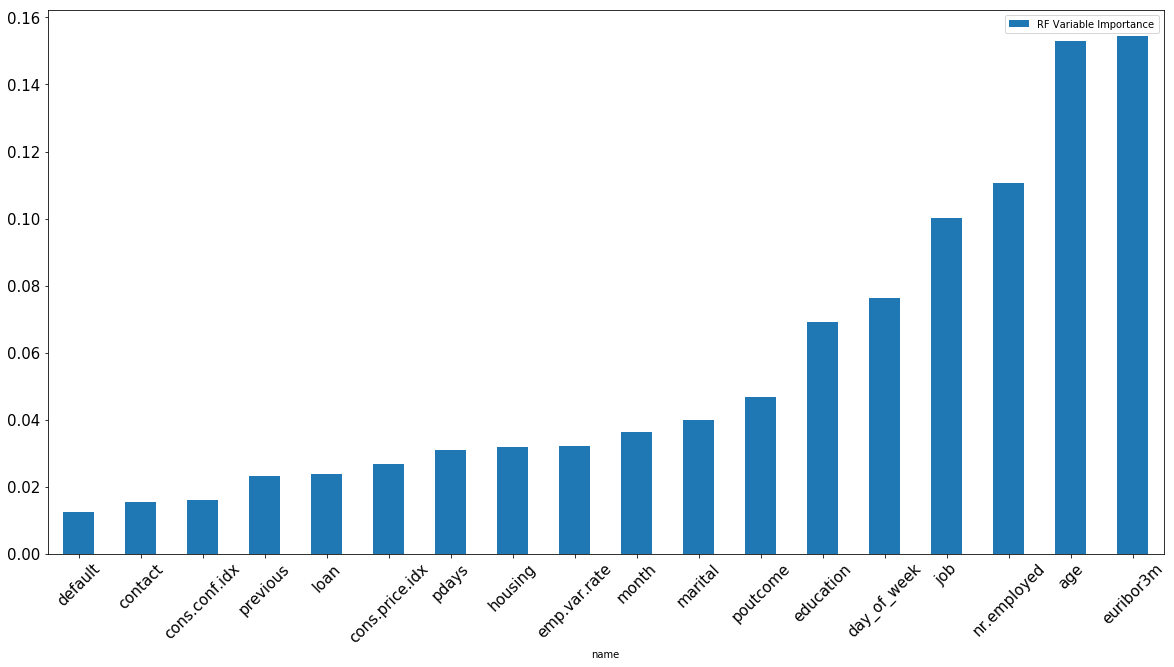

In [15]:
# Plotting Variable Importances
###########################################################################
vi.sort_values(by = 'RF Variable Importance').plot(kind='bar', rot=45, figsize = (20,10), fontsize = 15)

In [16]:
# Gradient Boosting Estimator Model

model1 = H2OGradientBoostingEstimator(distribution="bernoulli", ntrees=50, max_depth=3, min_rows=2, learn_rate=0.2, nfolds=5)

In [17]:
model1.train(X, y, training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [18]:
# AUC of GBE model
model1.auc()

0.8062244205523131

In [19]:
model1.accuracy

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1560196080937_283


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.07276083722359758
RMSE: 0.26974216804867124
LogLoss: 0.26135680128139493
Mean Per-Class Error: 0.25180561149976755
AUC: 0.8062244205523131
Gini: 0.6124488411046263
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2802233569782175: 


,no,yes,Error,Rate
no,24660.0,1709.0,0.0648,(1709.0/26369.0)
yes,1544.0,1710.0,0.4745,(1544.0/3254.0)
Total,26204.0,3419.0,0.1098,(3253.0/29623.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2802234,0.5125131,211.0
max f2,0.1041474,0.5513804,293.0
max f0point5,0.3792840,0.5557458,161.0
max accuracy,0.4859692,0.9087871,120.0
max precision,0.9324248,1.0,0.0
max recall,0.0289500,1.0,398.0
max specificity,0.9324248,1.0,0.0
max absolute_mcc,0.3557288,0.4546948,174.0
max min_per_class_accuracy,0.0672914,0.7299101,329.0
max mean_per_class_accuracy,0.1041474,0.7481944,293.0


Gains/Lift Table: Avg response rate: 10.98 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100260,0.7815443,8.1227094,8.1227094,0.8922559,0.8922559,0.0814382,0.0814382,712.2709372,712.2709372
,2,0.0200182,0.6630876,6.7354078,7.4302283,0.7398649,0.8161889,0.0673018,0.1487400,573.5407773,643.0228304
,3,0.0300105,0.5800800,6.2740785,7.0452785,0.6891892,0.7739033,0.0626921,0.2114321,527.4078473,604.5278529
,4,0.0400027,0.5123521,5.4129304,6.6375359,0.5945946,0.7291139,0.0540873,0.2655194,441.2930447,563.7535886
,5,0.0500287,0.4577286,4.4751531,6.2041839,0.4915825,0.6815115,0.0448679,0.3103872,347.5153088,520.4183868
,6,0.1000574,0.3164876,3.5197994,4.8619916,0.3866397,0.5340756,0.1760910,0.4864782,251.9799362,386.1991615
,7,0.1500186,0.1569303,1.9990936,3.9085512,0.2195946,0.4293429,0.0998771,0.5863553,99.9093631,290.8551242
,8,0.2000473,0.1009439,1.0749824,3.1999199,0.1180837,0.3515019,0.0537800,0.6401352,7.4982353,219.9919941
,9,0.3009148,0.0690208,0.7708172,2.3856773,0.0846720,0.2620597,0.0777505,0.7178857,-22.9182763,138.5677302
,10,0.4007022,0.0603996,0.5820615,1.9365207,0.0639378,0.2127211,0.0580824,0.7759680,-41.7938513,93.6520744




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.07976187078246065
RMSE: 0.28242144178950124
LogLoss: 0.28182010005188707
Mean Per-Class Error: 0.25518986904689966
AUC: 0.782105694776551
Gini: 0.564211389553102
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17238390227647776: 


,no,yes,Error,Rate
no,6052.0,598.0,0.0899,(598.0/6650.0)
yes,374.0,497.0,0.4294,(374.0/871.0)
Total,6426.0,1095.0,0.1292,(972.0/7521.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1723839,0.5055951,249.0
max f2,0.1358550,0.5508021,264.0
max f0point5,0.3700096,0.5103668,157.0
max accuracy,0.4595406,0.8974870,117.0
max precision,0.9561341,1.0,0.0
max recall,0.0298323,1.0,397.0
max specificity,0.9561341,1.0,0.0
max absolute_mcc,0.1723839,0.4361158,249.0
max min_per_class_accuracy,0.0658766,0.7175660,329.0
max mean_per_class_accuracy,0.1358550,0.7448101,264.0


Gains/Lift Table: Avg response rate: 11.58 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101050,0.7852984,6.9306454,6.9306454,0.8026316,0.8026316,0.0700344,0.0700344,593.0645356,593.0645356
,2,0.0200771,0.6784873,5.9868657,6.4618806,0.6933333,0.7483444,0.0597015,0.1297359,498.6865672,546.1880612
,3,0.0300492,0.5735181,4.8355454,5.9221676,0.56,0.6858407,0.0482204,0.1779564,383.5545350,492.2167583
,4,0.0400213,0.5039902,4.7204133,5.6227272,0.5466667,0.6511628,0.0470723,0.2250287,372.0413318,462.2727151
,5,0.0501263,0.4596930,4.7719198,5.4512116,0.5526316,0.6312997,0.0482204,0.2732491,377.1919753,445.1211602
,6,0.1001197,0.3186758,3.4907052,4.4722602,0.4042553,0.5179283,0.1745121,0.4477612,249.0705230,347.2260213
,7,0.1501130,0.1593139,2.6409941,3.8623788,0.3058511,0.4472985,0.1320321,0.5797933,164.0994088,286.2378846
,8,0.2002393,0.1003359,0.9619785,3.1363158,0.1114058,0.3632138,0.0482204,0.6280138,-3.8021482,213.6315816
,9,0.3000931,0.0692969,0.7128681,2.3299316,0.0825566,0.2698272,0.0711825,0.6991963,-28.7131892,132.9931577
,10,0.4007446,0.0603996,0.5475235,1.8822597,0.0634082,0.2179827,0.0551091,0.7543054,-45.2476465,88.2259749




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.07596438718863882
RMSE: 0.2756163768513018
LogLoss: 0.26991255492000077
Mean Per-Class Error: 0.25446632741417996
AUC: 0.7929069431443672
Gini: 0.5858138862887343
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21636504951867355: 


,no,yes,Error,Rate
no,24234.0,2135.0,0.081,(2135.0/26369.0)
yes,1475.0,1779.0,0.4533,(1475.0/3254.0)
Total,25709.0,3914.0,0.1219,(3610.0/29623.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2163650,0.4963728,237.0
max f2,0.1224851,0.5471990,279.0
max f0point5,0.4151152,0.5121177,150.0
max accuracy,0.4985456,0.9027782,120.0
max precision,0.9367482,1.0,0.0
max recall,0.0260567,1.0,399.0
max specificity,0.9367482,1.0,0.0
max absolute_mcc,0.2163650,0.4300820,237.0
max min_per_class_accuracy,0.0673596,0.7188076,328.0
max mean_per_class_accuracy,0.1224851,0.7455337,279.0


Gains/Lift Table: Avg response rate: 10.98 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100260,0.7716249,7.1725056,7.1725056,0.7878788,0.7878788,0.0719115,0.0719115,617.2505634,617.2505634
,2,0.0200182,0.6675242,6.2125679,6.6933462,0.6824324,0.7352445,0.0620774,0.1339889,521.2567900,569.3346158
,3,0.0300105,0.5803907,5.6897280,6.3591831,0.625,0.6985377,0.0568531,0.1908420,468.9728027,535.9183091
,4,0.0400027,0.5153228,4.4287613,5.8769849,0.4864865,0.6455696,0.0442532,0.2350953,342.8761275,487.6984899
,5,0.0500287,0.4595716,4.8429739,5.6697641,0.5319865,0.6228070,0.0485556,0.2836509,384.2973890,466.9764069
,6,0.1000236,0.3166374,3.4668539,4.5686807,0.3808238,0.5018562,0.1733251,0.4569760,246.6853863,356.8680703
,7,0.1500186,0.1544004,2.4772023,3.8716781,0.2721134,0.4252925,0.1238476,0.5808236,147.7202317,287.1678117
,8,0.2001148,0.1032920,1.0305922,3.1604481,0.1132075,0.3471660,0.0516288,0.6324524,3.0592246,216.0448119
,9,0.3000034,0.0712742,0.6953044,2.3396582,0.0763772,0.2570046,0.0694530,0.7019053,-30.4695622,133.9658164
,10,0.4002296,0.0609056,0.5764467,1.8981117,0.0633210,0.2085020,0.0577750,0.7596804,-42.3553321,89.8111698



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.8790349,0.0052435,0.8791190,0.8723227,0.8721107,0.8790987,0.8925234
auc,0.7944149,0.0106334,0.8038586,0.8029378,0.7786701,0.7743501,0.8122581
err,0.1209651,0.0052435,0.1208810,0.1276772,0.1278893,0.1209013,0.1074766
err_count,717.2,36.890106,719.0,769.0,758.0,719.0,621.0
f0point5,0.4739888,0.0089095,0.4746918,0.4699063,0.4602564,0.4676847,0.4974048
f1,0.5000936,0.0101105,0.5017325,0.4977139,0.4864499,0.4882562,0.5263158
f2,0.5292760,0.0118526,0.53204,0.5290197,0.5158046,0.5107207,0.558795
lift_top_group,7.2002535,0.2820285,7.135171,7.011808,7.246083,6.6991296,7.9090753
logloss,0.2697761,0.0086013,0.2671402,0.2762721,0.2818129,0.2763095,0.2473460
max_per_class_error,0.4492769,0.0133702,0.4456355,0.4478261,0.4625748,0.4731183,0.4172297


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2019-06-10 21:49:05,5.892 sec,0.0,0.3126991,0.3461955,0.5,1.0,0.8901529,0.3200514,0.3586698,0.5,1.0,0.8841909
,2019-06-10 21:49:05,5.937 sec,1.0,0.2972909,0.3103266,0.7652760,6.7135434,0.1162610,0.3047385,0.3222669,0.7533065,6.0579944,0.1174046
,2019-06-10 21:49:05,5.980 sec,2.0,0.2900203,0.2966446,0.7694392,7.1087598,0.1187928,0.2974709,0.3083920,0.7593161,6.7577497,0.1196649
,2019-06-10 21:49:05,6.024 sec,3.0,0.2855284,0.2887479,0.7749389,7.1087598,0.1187928,0.2930498,0.3006424,0.7642140,6.7577497,0.1196649
,2019-06-10 21:49:05,6.064 sec,4.0,0.2826487,0.2839709,0.7752163,7.3259457,0.1193330,0.2901043,0.2956716,0.7647298,6.7460175,0.1199309
---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2019-06-10 21:49:07,7.909 sec,46.0,0.2700561,0.2618377,0.8052180,8.0614059,0.1146069,0.2824240,0.2819103,0.7821331,6.7034111,0.1313655
,2019-06-10 21:49:07,7.967 sec,47.0,0.2699736,0.2617116,0.8055162,8.0614059,0.1150120,0.2824233,0.2819189,0.7817830,6.7034111,0.1293711
,2019-06-10 21:49:07,8.028 sec,48.0,0.2698965,0.2616036,0.8055931,8.0920576,0.1039733,0.2824665,0.2819515,0.7817014,6.7034111,0.1293711
,2019-06-10 21:49:07,8.085 sec,49.0,0.2698102,0.2614855,0.8058870,8.1227094,0.1101171,0.2824465,0.2819039,0.7819141,6.9306454,0.1295041



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
nr.employed,1035.6594238,1.0,0.5698666
month,250.7660217,0.2421317,0.1379828
pdays,131.4948883,0.1269673,0.0723544
poutcome,95.3072739,0.0920257,0.0524424
euribor3m,90.2903671,0.0871815,0.0496818
job,45.5045662,0.0439378,0.0250387
contact,43.4821167,0.0419850,0.0239258
day_of_week,39.8508835,0.0384788,0.0219278
age,36.9514999,0.0356792,0.0203324
cons.conf.idx,15.0515985,0.0145333,0.0082821


<bound method H2OBinomialModel.accuracy of >

In [20]:
#Looking at variable importance from Gradient Boosting Estimator

gbe = pd.DataFrame(model1.varimp())
gbe

,0,1,2,3
0,nr.employed,1035.659424,1.000000,0.569867
1,month,250.766022,0.242132,0.137983
2,pdays,131.494888,0.126967,0.072354
3,poutcome,95.307274,0.092026,0.052442
4,euribor3m,90.290367,0.087182,0.049682
5,job,45.504566,0.043938,0.025039
6,contact,43.482117,0.041985,0.023926
7,day_of_week,39.850883,0.038479,0.021928
8,age,36.951500,0.035679,0.020332
9,cons.conf.idx,15.051599,0.014533,0.008282


In [28]:
dfh2 = dfh.drop(["default", "housing", "loan", "marital", "emp.var.rate", "cons.conf.idx", "cons.price.idx", "previous", "education"])
train2, valid2 = dfh2.split_frame(ratios = [.8])
X2 = dfh2.col_names[:-1] 
y2 = dfh2.col_names[-1]

In [29]:
model2 = H2OGradientBoostingEstimator(distribution="bernoulli", ntrees=50, max_depth=3, min_rows=2, learn_rate=0.2, nfolds=5)
model2.train(X2, y2, training_frame=train2, validation_frame=valid2)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [30]:
# AUC of optimized model
model2.auc()

0.8022021306336147

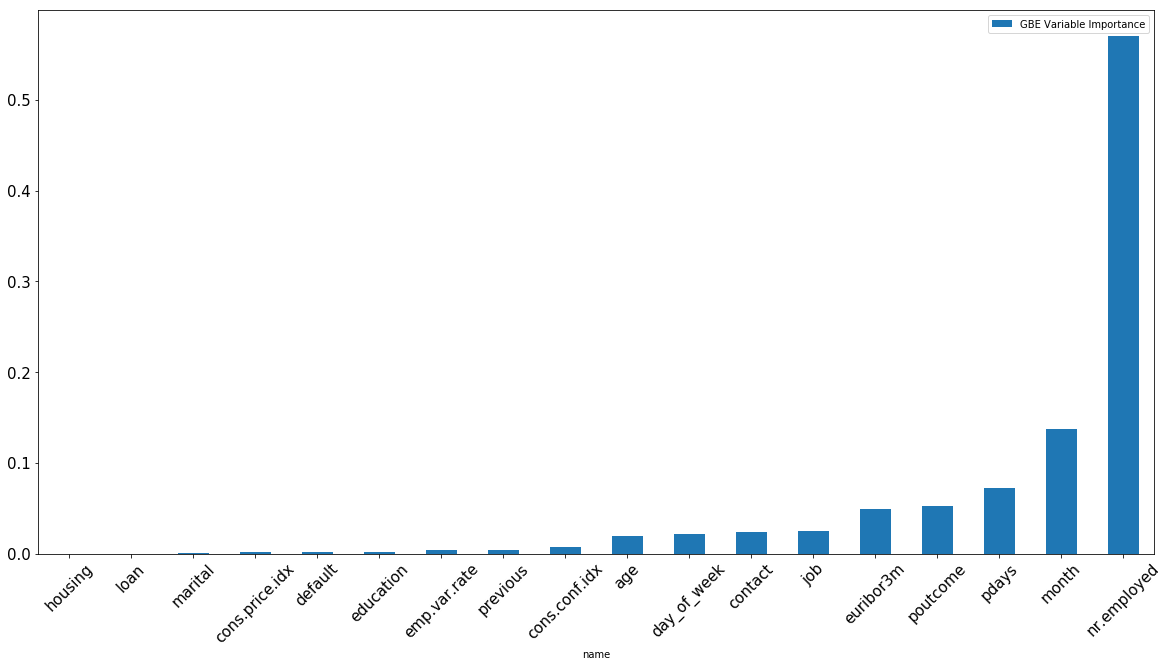

In [31]:
# Plotting Variable Importance

vi_gb = gbe.drop([1,2], axis = 1)
vi_gb = vi_gb.rename(index=str, columns={0: "name", 3: "GBE Variable Importance"})
vi_gb = vi_gb.set_index('name')
vi_gb.sort_values(by = 'GBE Variable Importance').plot(kind='bar', rot=45, figsize = (20,10), fontsize = 15)

In [32]:
# Variable Importance from Gradient Boosting
vi_gb

,GBE Variable Importance
name,
nr.employed,0.569867
month,0.137983
pdays,0.072354
poutcome,0.052442
euribor3m,0.049682
job,0.025039
contact,0.023926
day_of_week,0.021928
age,0.020332
